In [1]:
import pandas as pd
import numpy as np


In [2]:
train_path= "train_data.txt"
train_df = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [3]:
train_df.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
train_df.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [6]:
test_path= "test_data.txt"
test_df = pd.read_csv(test_path, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [7]:
test_df.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [8]:
test_df.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

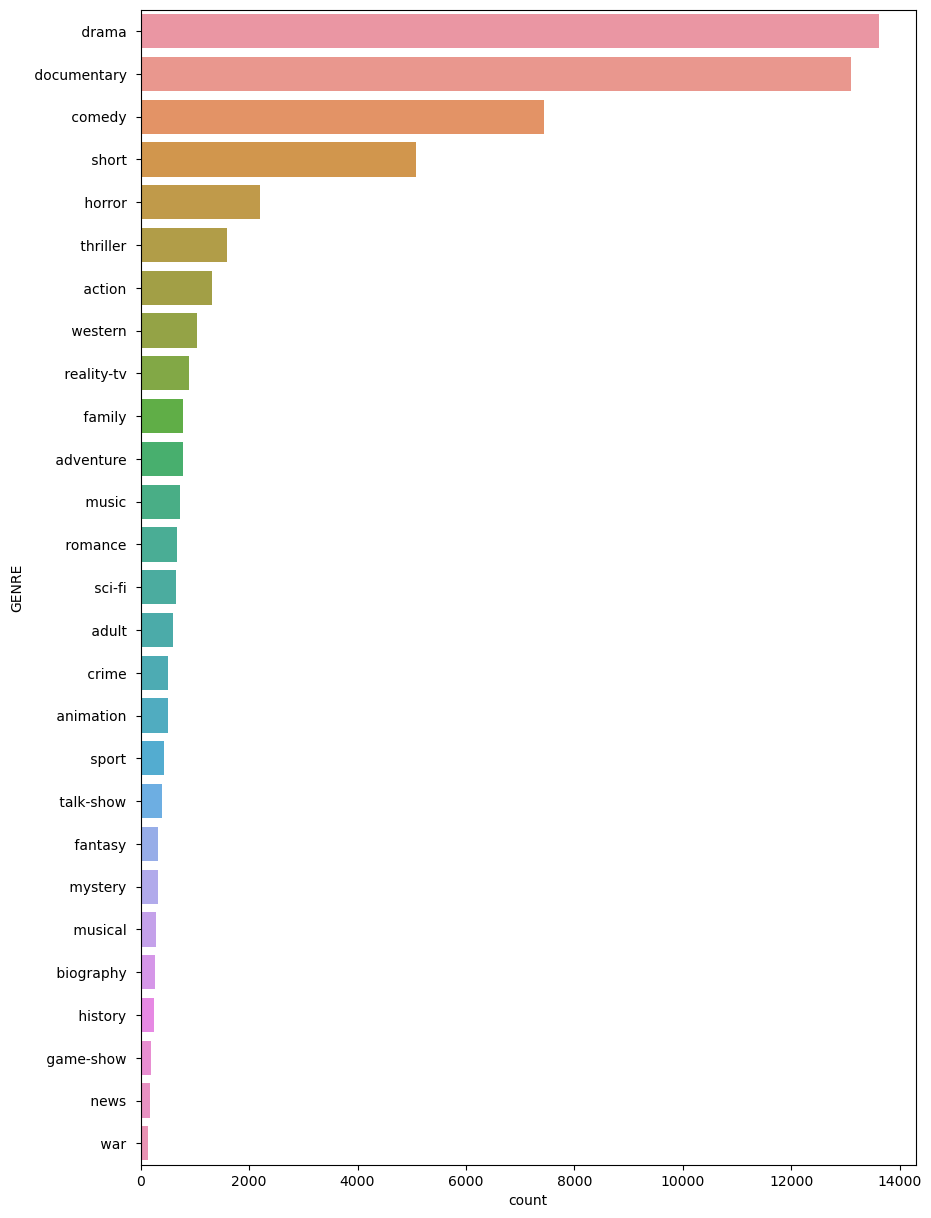

In [10]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_df, y="GENRE", order= train_df["GENRE"].value_counts().index)
plt.show()

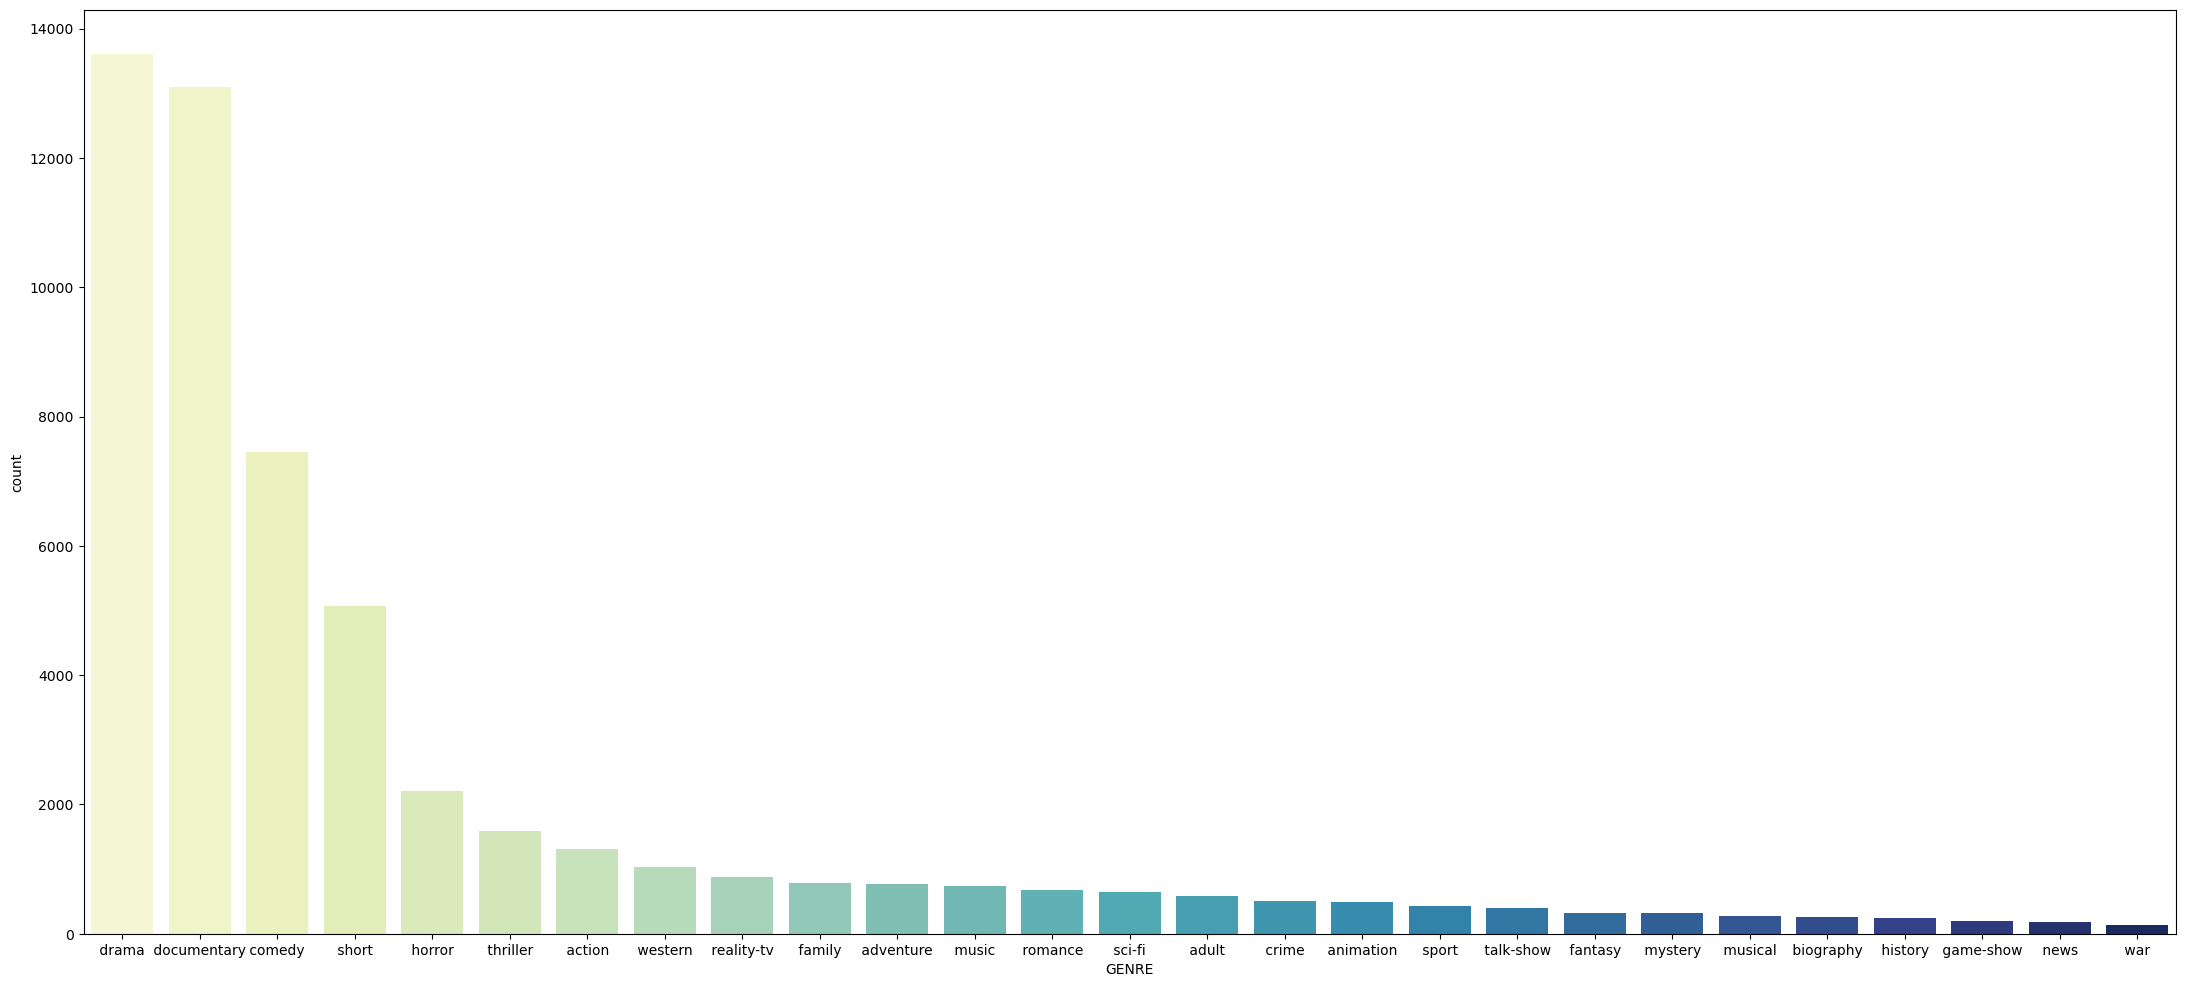

In [11]:
plt.figure(figsize=(27,12))
sns.countplot(data=train_df, x="GENRE", order= train_df["GENRE"].value_counts().index, palette = "YlGnBu")
plt.show()

In [12]:
import re  # used for pattern matching and text manipulation.
import string 

In [13]:
import nltk 
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer 

In [14]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_df["TextCleaning"] = train_df["DESCRIPTION"].apply(cleaning_data)
test_df["TextCleaning"] = test_df["DESCRIPTION"].apply(cleaning_data)

In [15]:
train_df.head()

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


In [16]:
test_df.head()

,ID,TITLE,DESCRIPTION,TextCleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(train_df["TextCleaning"])
X_test = vectorize.transform(test_df["TextCleaning"])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = X_train
y = train_df["GENRE"]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , precision_score

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predict the genres for the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted', zero_division=1)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Precision:", nb_precision)


Naive Bayes Accuracy: 0.4460942543576501
Naive Bayes Precision: 0.6327697894478221


In [23]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted', zero_division=1)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Precision:", lr_precision)

Logistic Regression Accuracy: 0.5782532509453103
Logistic Regression Precision: 0.5893831834436996


      -----------------------------------------RAKESH RENUKUNTLA-------------------------------------------